<a href="https://colab.research.google.com/github/MazurovaNN/Transfer-learning/blob/main/seminar3_dz3_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

**ДЗ_3   Объясняем работу примера style transfer (красивые примеры тут, colab)**

@title Licensed under the Apache License, Version 2.0 (the "License");
You may not use this file except in compliance with the License.
You may obtain a copy of the License at:
https://www.apache.org/licenses/LICENSE-2.0
#
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

@title Лицензирован по лицензии Apache версии 2.0 ("Лицензия");
Вы можете использовать этот файл только в соответствии с Лицензией.
Копию Лицензии вы можете получить по адресу:
https://www.apache.org/licenses/LICENSE-2.0
#
За исключением случаев, предусмотренных действующим законодательством или оговоренных в письменной форме, программное
обеспечение, распространяемое по Лицензии, распространяется на УСЛОВИЯХ "КАК ЕСТЬ",
БЕЗ КАКИХ-ЛИБО ГАРАНТИЙ ИЛИ УСЛОВИЙ, явных или подразумеваемых.
Конкретные формулировки, регулирующие разрешения и
ограничения по Лицензии, приведены в Лицензии.

# Neural style transfer

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/style_transfer"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/style_transfer.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/style_transfer.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/style_transfer.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

This tutorial uses deep learning to compose one image in the style of another image (ever wish you could paint like Picasso or Van Gogh?). This is known as *neural style transfer* and the technique is outlined in <a href="https://arxiv.org/abs/1508.06576" class="external">A Neural Algorithm of Artistic Style</a> (Gatys et al.).

Note: This tutorial demonstrates the original style-transfer algorithm. It optimizes the image content to a particular style. Modern approaches train a model to generate the stylized image directly (similar to [CycleGAN](./cyclegan.ipynb)). This approach is much faster (up to 1000x).

For a simple application of style transfer with a pretrained model from [TensorFlow Hub](https://tfhub.dev), check out the [Fast style transfer for arbitrary styles](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization) tutorial that uses an [arbitrary image stylization model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2). For an example of style transfer with [TensorFlow Lite](https://www.tensorflow.org/lite), refer to [Artistic style transfer with TensorFlow Lite](https://www.tensorflow.org/lite/examples/style_transfer/overview).

Neural style transfer is an optimization technique used to take two images—a *content* image and a *style reference* image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.


В этом руководстве используется глубокое обучение для создания одного изображения в стиле другого изображения (вы когда-нибудь мечтали рисовать, как Пикассо или Ван Гог?). Это называется нейронным переносом стиля, и техника описана в Нейронном алгоритме художественного стиля (Гейтс и др.).

Примечание: В этом руководстве демонстрируется оригинальный алгоритм переноса стиля. Он оптимизирует содержимое изображения в соответствии с определенным стилем. Современные подходы обучают модель генерировать стилизованное изображение напрямую (аналогично Cycle AGAIN). Этот подход намного быстрее (до 1000 раз).

Нейронный перенос стиля — это метод оптимизации, используемый для того, чтобы взять два изображения — изображение содержимого и эталонное изображение стиля (например, произведение известного художника) - и смешать их вместе, чтобы выходное изображение выглядело как изображение содержимого, но было “нарисовано” в стиле эталонного изображения стиля.

Это достигается путем оптимизации выходного изображения в соответствии со статистикой содержимого основного изображения и статистикой стиля эталонного изображения. Эти статистические данные извлекаются из изображений с использованием сверточной сети.

For example, let’s take an image of this dog and Wassily Kandinsky's Composition 7:

Для примера возьмем изображение собаки и композицию Василия Кандинского "7":

<img src="https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg" width="500px"/>

[Yellow Labrador Looking](https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg), from Wikimedia Commons by [Elf](https://en.wikipedia.org/wiki/User:Elf). License [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)

<img src="https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg" width="500px"/>


Now, what would it look like if Kandinsky decided to paint the picture of this Dog exclusively with this style? Something like this?

А теперь, как бы это выглядело, если бы Кандинский решил изобразить эту собаку исключительно в таком стиле? Что-то вроде этого?

<img src="https://tensorflow.org/tutorials/generative/images/stylized-image.png" style="width: 500px;"/>

## Setup

### Import and configure modules

In [6]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [7]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [8]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Download images and choose a style image and a content image:

Загрузим изображения: выбирем стиль изображения и его содержание:

In [9]:
#content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
#style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

content_path = tf.keras.utils.get_file('6449411530.jpg', 'https://cdn1.ozone.ru/s3/multimedia-m/6449411530.jpg')
style_path = tf.keras.utils.get_file('28957094.jpg','https://static.tildacdn.com/stor3837-3532-4231-b437-393132656261/28957094.jpg')

## Visualize the input

Define a function to load an image and limit its maximum dimension to 512 pixels.

Определим функцию для загрузки изображения и ограничим его максимальный размер 512 пикселями.

In [10]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Create a simple function to display an image:

Создадим простую функцию для отображения изображений:

In [11]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

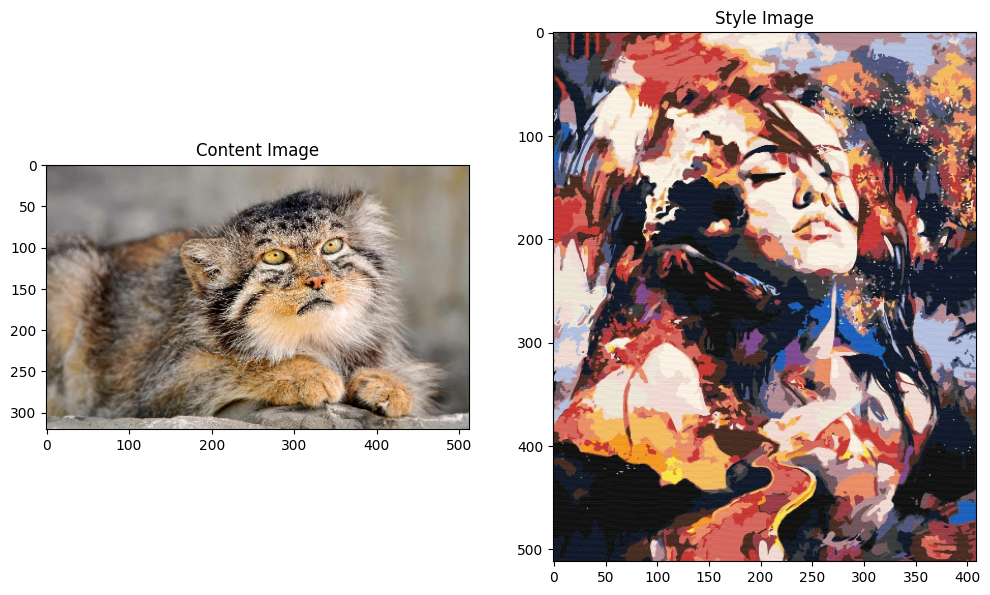

In [12]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## Fast Style Transfer using TF-Hub / Быстрая передача данных с помощью TF-концентратора

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the [TensorFlow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) does this:

В этом руководстве демонстрируется оригинальный алгоритм переноса стиля, который оптимизирует содержимое изображения в соответствии с определенным стилем. Прежде чем перейти к деталям, давайте посмотрим, как это делает модель TensorFlow Hub:

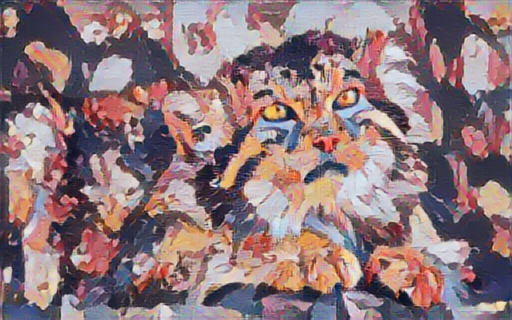

In [13]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

## Define content and style representations / Определение представления контента и стиля

Use the intermediate layers of the model to get the *content* and *style* representations of the image. Starting from the network's input layer, the first few layer activations represent low-level features like edges and textures. As you step through the network, the final few layers represent higher-level features—object parts like *wheels* or *eyes*. In this case, you are using the VGG19 network architecture, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from the images. For an input image, try to match the corresponding style and content target representations at these intermediate layers.

Используйте промежуточные слои модели, чтобы получить представление "содержимого" и "стиля" изображения. Начиная с входного слоя сети, первые несколько активаций слоев представляют низкоуровневые объекты, такие как края и текстуры. По мере продвижения по сети последние несколько слоев представляют объекты более высокого уровня - части объектов, такие как "колеса" или "глаза". В данном случае вы используете сетевую архитектуру VGG 19, предварительно обученную сеть классификации изображений. Эти промежуточные слои необходимы для определения представления контента и стиля изображений. Для входного изображения постарайтесь сопоставить соответствующие целевые представления стиля и содержания на этих промежуточных уровнях.


Load a [VGG19](https://keras.io/api/applications/vgg/#vgg19-function) and test run it on our image to ensure it's used correctly:

Загрузим aVG G 19 и протестируем его на нашем образе, чтобы убедиться, что он используется правильно:

In [14]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


TensorShape([1, 1000])

In [15]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[('lynx', 0.36216146),
 ('tiger_cat', 0.17772765),
 ('coyote', 0.12446298),
 ('timber_wolf', 0.05958794),
 ('tabby', 0.04016651)]

Now load a `VGG19` without the classification head, and list the layer names

Теперь загрузите aVG G 19 без заголовка классификации и перечислите названия слоев

In [16]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


Choose intermediate layers from the network to represent the style and content of the image:

Выберим промежуточные слои из сети, чтобы представить стиль и содержание изображения:

In [17]:
content_layers = ['block5_conv2']

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

#### Intermediate layers for style and content / Промежуточные уровни для стиля и контента

So why do these intermediate outputs within our pretrained image classification network allow us to define style and content representations?

At a high level, in order for a network to perform image classification (which this network has been trained to do), it must understand the image. This requires taking the raw image as input pixels and building an internal representation that converts the raw image pixels into a complex understanding of the features present within the image.

This is also a reason why convolutional neural networks are able to generalize well: they’re able to capture the invariances and defining features within classes (e.g. cats vs. dogs) that are agnostic to background noise and other nuisances. Thus, somewhere between where the raw image is fed into the model and the output classification label, the model serves as a complex feature extractor. By accessing intermediate layers of the model, you're able to describe the content and style of input images.
#

Итак, почему эти промежуточные результаты в нашей предварительно обученной сети классификации изображений позволяют нам определять представления стиля и контента?

На высоком уровне, чтобы сеть могла выполнять классификацию изображений (чему эта сеть была обучена), она должна понимать изображение. Это требует использования необработанного изображения в качестве входных пикселей и создания внутреннего представления, которое преобразует необработанные пиксели изображения в комплексное представление об особенностях, присутствующих в изображении.

Это также является причиной того, что сверточные нейронные сети способны хорошо обобщать: они способны улавливать инварианты и определяющие признаки внутри классов (например, кошек и собак), которые не подвержены фоновому шуму и другим неприятностям. Таким образом, где-то между тем местом, где необработанное изображение загружается в модель, и меткой классификации на выходе, модель служит для извлечения сложных объектов. Получая доступ к промежуточным слоям модели, вы можете описать содержание и стиль входных изображений.

## Build the model / Создаем модель

The networks in `tf.keras.applications` are designed so you can easily extract the intermediate layer values using the Keras functional API.

To define a model using the functional API, specify the inputs and outputs:

`model = Model(inputs, outputs)`

This following function builds a VGG19 model that returns a list of intermediate layer outputs:

Сети в tf.keras.applications спроектированы таким образом, чтобы вы могли легко извлекать значения промежуточного уровня с помощью функционального API Keras.

Чтобы определить модель с помощью функционального API, укажите входы и выходы:

model = Модель(входы, выходы)

Следующая функция создает модель VGG19, которая возвращает список выходных данных промежуточного уровня:

In [18]:
def vgg_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

And to create the model:
Создаем модель:

In [19]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 512, 409, 64)
  min:  0.0
  max:  812.3536
  mean:  30.379353

block2_conv1
  shape:  (1, 256, 204, 128)
  min:  0.0
  max:  4102.634
  mean:  180.09

block3_conv1
  shape:  (1, 128, 102, 256)
  min:  0.0
  max:  7894.198
  mean:  199.80972

block4_conv1
  shape:  (1, 64, 51, 512)
  min:  0.0
  max:  21039.201
  mean:  729.6758

block5_conv1
  shape:  (1, 32, 25, 512)
  min:  0.0
  max:  4019.4158
  mean:  54.88967



## Calculate style / Воспроизводим стиль

The content of an image is represented by the values of the intermediate feature maps.

It turns out, the style of an image can be described by the means and correlations across the different feature maps. Calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

Содержимое изображения представлено значениями промежуточных карт объектов.

Оказывается, стиль изображения можно описать с помощью значений и корреляций между различными картами объектов. Рассчитайте матрицу Грама, включающую эту информацию, взяв внешнее произведение вектора признаков на себя в каждом местоположении и усреднив это внешнее произведение по всем местоположениям. Эта матрица Грама может быть рассчитана для конкретного слоя следующим образом:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

This can be implemented concisely using the `tf.linalg.einsum` function:

Это может быть реализовано в сжатой форме с помощью функции `tf.linalg.einsum`:

In [20]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## Extract style and content / Извлекаем стиль и содержание

Build a model that returns the style and content tensors.

Создаем модель, которая возвращает тензоры стиля и содержимого.

In [21]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

When called on an image, this model returns the gram matrix (style) of the `style_layers` and content of the `content_layers`:

При вызове для изображения эта модель возвращает матрицу gram (style) `style_layers` и содержимое `content_layers`:

In [22]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.04334843
    max:  15601.969
    mean:  308.19635

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  114657.484
    mean:  12221.602

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  187834.72
    mean:  9718.828

   block4_conv1
    shape:  (1, 512, 512)
    min:  1.638655
    max:  3835559.5
    mean:  197891.02

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  211627.16
    mean:  1998.166

Contents:
   block5_conv2
    shape:  (1, 20, 32, 512)
    min:  0.0
    max:  1719.5443
    mean:  16.391676


## Run gradient descent / Запускаем градиентный спуск

With this style and content extractor, you can now implement the style transfer algorithm. Do this by calculating the mean square error for your image's output relative to each target, then take the weighted sum of these losses.

С помощью этого инструмента можно реализовать алгоритм переноса стиля. Для этого рассчитаем среднеквадратичную ошибку для вывода нашего изображения относительно каждого целевого объекта, а затем возьмем взвешенную сумму этих потерь.

Set your style and content target values:
Установим целевые значения для нашего стиля и содержимого:

In [23]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

Define a `tf.Variable` to contain the image to optimize. To make this quick, initialize it with the content image (the `tf.Variable` must be the same shape as the content image):

Определим переменную `tf.Variable`, которая будет содержать изображение для оптимизации. Чтобы ускорить процесс, инициализируем ее с помощью изображения содержимого (переменная `tf.Variable` должна иметь ту же форму, что и базовое изображение):

In [24]:
image = tf.Variable(content_image)

Since this is a float image, define a function to keep the pixel values between 0 and 1:

Поскольку это плавающее изображение, определим функцию, которая будет поддерживать значения пикселей в диапазоне от 0 до 1

In [25]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

Create an optimizer. The paper recommends LBFGS, but Adam works okay, too:

Создадим оптимизатор. В статье рекомендуется использовать LBFGS, но Adam тоже работает нормально:

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

To optimize this, use a weighted combination of the two losses to get the total loss:

Для оптимизации использем взвешенную комбинацию двух потерь, чтобы получить общий убыток:

In [27]:
style_weight=1e-2
content_weight=1e4

In [28]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2)
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2)
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

Use `tf.GradientTape` to update the image.

Используем функцию `tf.GradientTape` для обновления изображения.

In [29]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

Now run a few steps to test:

Теперь выполните несколько шагов для проверки:

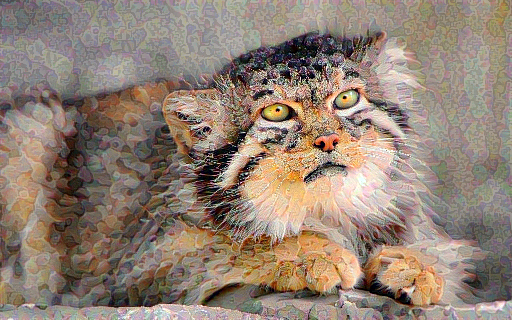

In [30]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

Since it's working, perform a longer optimization:

Так как предыдущий шаг сработал, выполним проверку на более длительной оптимизации:

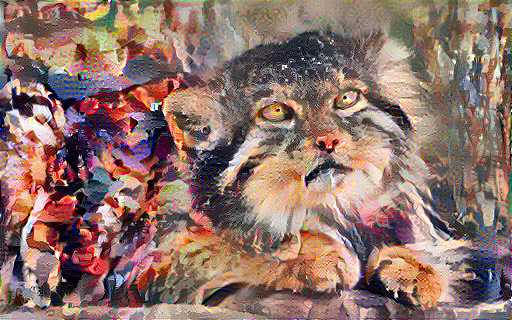

Train step: 400
Total time: 2254.2


In [42]:
import time
start = time.time()

epochs = 4
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

## Total variation loss / Полная потеря вариативности

One downside to this basic implementation is that it produces a lot of high frequency artifacts. Decrease these using an explicit regularization term on the high frequency components of the image. In style transfer, this is often called the *total variation loss*:

Одним из недостатков этой базовой реализации является то, что она создает множество высокочастотных искажений. Уменьшим их, используя явный термин регуляризации для высокочастотных компонентов изображения. При передаче стиля это часто называется *total variation loss*:

In [32]:
def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

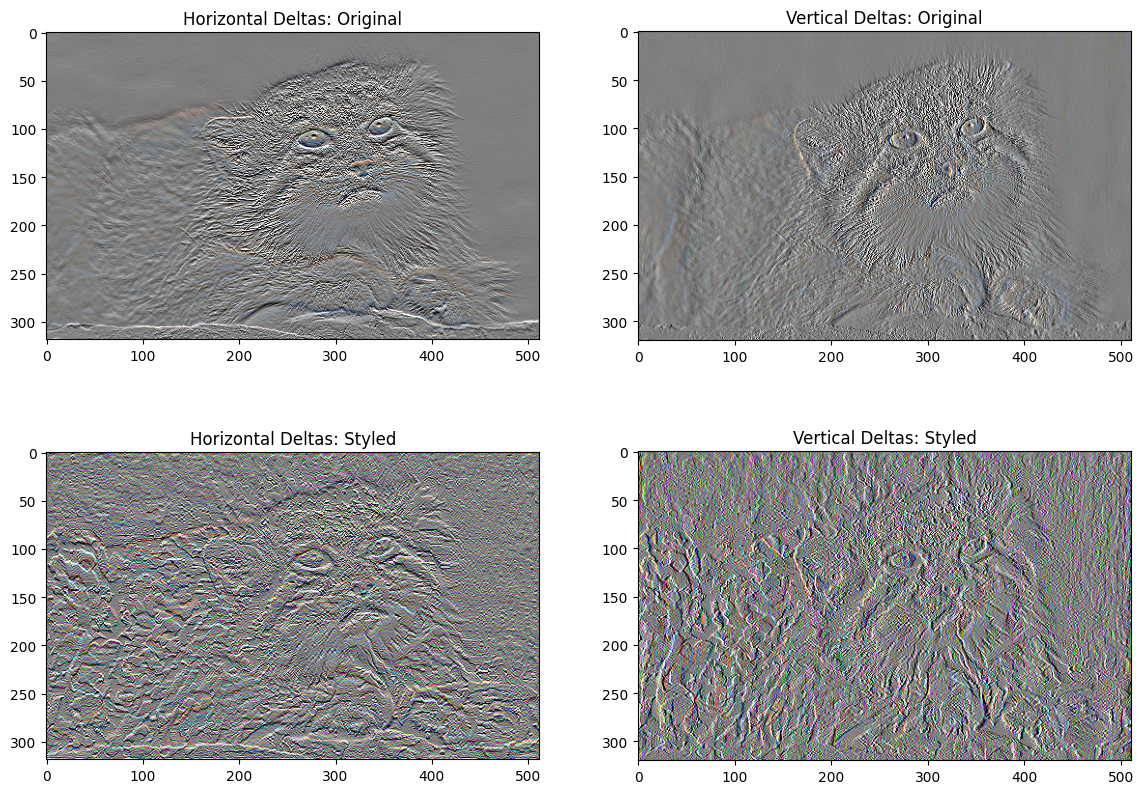

In [33]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

This shows how the high frequency components have increased.

Это показывает, насколько возросли высокочастотные составляющие.

Also, this high frequency component is basically an edge-detector. You can get similar output from the Sobel edge detector, for example:

Кроме того, эта высокочастотная составляющая, по сути, является детектором границ. Мы можем получить аналогичный результат, например, от детектора границ Sobel:

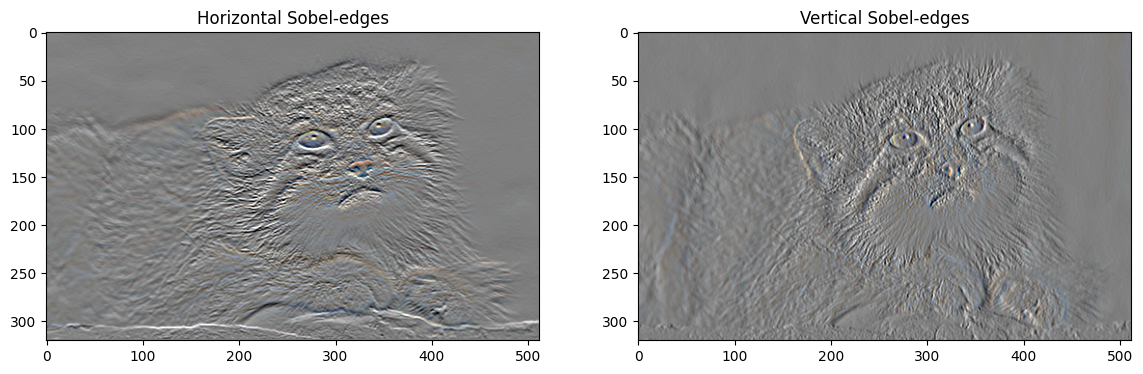

In [34]:
plt.figure(figsize=(14, 10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1, 2, 1)
imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1, 2, 2)
imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")

The regularization loss associated with this is the sum of the squares of the values:

Потери при регуляризации, связанные с этим, равны сумме квадратов значений:

In [35]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [36]:
total_variation_loss(image).numpy()

114887.38

That demonstrated what it does. But there's no need to implement it yourself, TensorFlow includes a standard implementation:

Предыдущий шаг продемонстрировал нам, что код рабочий. Но нет необходимости реализовывать это самостоятельно, TensorFlow включает стандартную реализацию:

In [37]:
tf.image.total_variation(image).numpy()

array([114887.38], dtype=float32)

## Re-run the optimization / Повторим оптимизацию

Choose a weight for the `total_variation_loss`:

Выберим вес для значения `total_variation_loss`:

In [38]:
total_variation_weight=30

Now include it in the `train_step` function:

И включим его в функцию `train_step`:

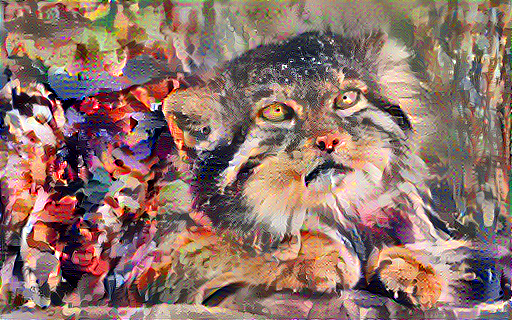

Train step: 1000
Total time: 5658.1


In [39]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

Finally, save the result:

Сохраним результат:

In [40]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Learn more / Узнать больше

This tutorial demonstrates the original style-transfer algorithm. For a simple application of style transfer check out this [tutorial](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization) to learn more about how to use the arbitrary image style transfer model from [TensorFlow Hub](https://tfhub.dev).

В этом руководстве демонстрируется оригинальный алгоритм переноса стилей. Чтобы получить представление о простом применении метода переноса стилей, ознакомьтесь с этим руководством [tutorial](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization) и узнайте больше о том, как использовать модель переноса стилей произвольных изображений из [TensorFlow Hub](https://tfhub.dev).